In [0]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor()])
trainloader = datasets.EMNIST("emnist/" , split = 'byclass' , download = True , transform = transform , train = True)
testloader = datasets.EMNIST("emnist/" , split = 'byclass' , download = True , transform = transform , train = False)

Extracting emnist/EMNIST/raw/emnist.zip to emnist/EMNIST/raw
Processing byclass
Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [0]:
batch_size = 256
lr = 1e-3
momentum=0.9

In [0]:
train_data = torch.utils.data.DataLoader(trainloader , shuffle = True , batch_size = batch_size )
test_data = torch.utils.data.DataLoader(testloader , shuffle = True , batch_size = batch_size)

In [0]:
train_iter = iter(train_data)
images , labels = train_iter.next()

In [0]:
images.shape , labels.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

In [0]:
value = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
        'T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','z']

In [0]:
# defining the architecture
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

class emnist(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(1 , 32 , 5 , 1)
    self.max1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32 , 64 , 5 , 1)
    self.max2 = nn.MaxPool2d(2,2)

    self.fc1 = nn.Linear(4*4*64 , 200)
    self.fc2 = nn.Linear(200 , 170)
    self.fc3 = nn.Linear(170 , 150)
    self.fc4 = nn.Linear(150 , 120)
    self.output = nn.Linear(120 , 62)

  def forward(self , x):

    x = F.relu(self.conv1(x))
    x = self.max1(x)
    x = F.relu(self.conv2(x))
    x = self.max2(x)

    #flatting
    x = x.view(-1 , 4*4*64)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.output(x)

    return x

In [0]:
model = emnist()
model.apply(init_weights)
model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = lr )

In [0]:
epochs = 20
train_losses , test_losses = [] , []
for e in range(epochs):
  running_loss = 0
  for images , labels in train_data:
    images, labels = images.cuda(), labels.cuda()
    optimizer.zero_grad()
    logits = model(images)
    loss = criterion(logits , labels)
    
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  else:
    test_loss = 0
    total = 0
    correct = 0

    with torch.no_grad():
      model.eval()
      for images , labels in test_data:
        images, labels = images.cuda(), labels.cuda()
        logits_test = model(images)
        test_loss += criterion(logits_test , labels)
        ps = torch.exp(logits_test)
        _, predicted = ps.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("epochs {}/{}" .format(e+1 , epochs),
              "training loss: {:.3f}..".format(running_loss/len(train_data)),
              "test loss: {:.3f}..".format(test_loss/len(test_data)),
              "test Accuracy: {:.3f}..".format(correct/total))

epochs 1/20 training loss: 0.558.. test loss: 0.417.. test Accuracy: 0.848..
epochs 2/20 training loss: 0.393.. test loss: 0.381.. test Accuracy: 0.860..
epochs 3/20 training loss: 0.370.. test loss: 0.371.. test Accuracy: 0.863..
epochs 4/20 training loss: 0.356.. test loss: 0.361.. test Accuracy: 0.866..
epochs 5/20 training loss: 0.344.. test loss: 0.357.. test Accuracy: 0.868..
epochs 6/20 training loss: 0.335.. test loss: 0.360.. test Accuracy: 0.865..
epochs 7/20 training loss: 0.328.. test loss: 0.360.. test Accuracy: 0.866..
epochs 8/20 training loss: 0.321.. test loss: 0.358.. test Accuracy: 0.868..
epochs 9/20 training loss: 0.316.. test loss: 0.360.. test Accuracy: 0.868..
epochs 10/20 training loss: 0.310.. test loss: 0.358.. test Accuracy: 0.869..
epochs 11/20 training loss: 0.306.. test loss: 0.363.. test Accuracy: 0.867..
epochs 12/20 training loss: 0.302.. test loss: 0.362.. test Accuracy: 0.868..
epochs 13/20 training loss: 0.298.. test loss: 0.364.. test Accuracy: 0.8

In [0]:
test_iter = iter(test_data)
images , labels = test_iter.next()

In [0]:
images.shape

torch.Size([256, 1, 28, 28])

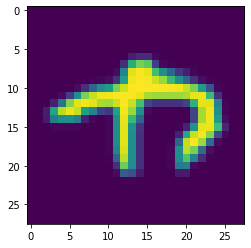

In [0]:
import matplotlib.pyplot as plt

plt.imshow( images[101].reshape(28,28))

In [0]:
images.shape

torch.Size([256, 1, 28, 28])

In [0]:
model.eval()
with torch.no_grad():
  images = images.cuda()
  out = model(images[101].reshape(1,1,28,28))
  _ , h = out.max(1)
value[h]

't'

'3'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
torch.save(model , '/content/drive/My Drive/Model files/emnist_model_1.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type emnist. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
model_1 = torch.load('/content/drive/My Drive/Model files/emnist_model.pth' , m)

In [0]:
model_1.eval()
with torch.no_grad():
  out = model(images[12].reshape(1,1,28,28))
  _ , h = out.max(1)

In [0]:
value[h]

'x'